# Erdős-Rényi model

Let $V = \{1,\dots,N\}$ be the graph's vertices, and for every $a,b \in V$, let there be an edge $(a\to b)$ with probability $p_N$ (regardless of $a,b$). The resulting graph is called an Erdős-Rényi graph. 

## Code

In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from math import comb

In [2]:
random.seed(1)
def GenErdosRenyi(N,p):
    adjacency = np.random.rand(N,N)
    G=nx.Graph()
    rows,cols = np.where(adjacency<p)
    edges = zip(rows.tolist(),cols.tolist())
    G.add_nodes_from(range(N))
    G.add_edges_from(edges)
    return G

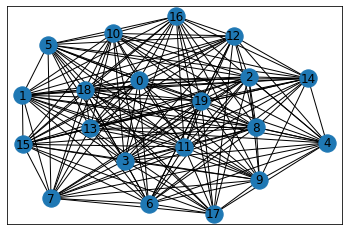

In [3]:
N = 20
p = 0.7
G = GenErdosRenyi(N,p)
nx.draw_networkx(G)

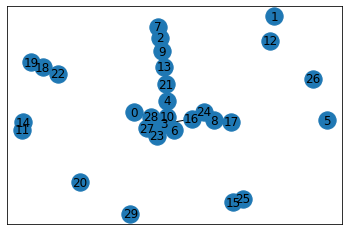

In [45]:
N = 30
p = 0.03
G = GenErdosRenyi(N,p)
nx.draw_networkx(G)

## Average Clustering of a Graph

In [8]:
def avg_clustering(G):
    trgls = nx.triangles(G)
    trgls = {k: (trgls[k]/comb(G.degree(k),2) if G.degree(k)>=2 else 0)
            for k in trgls.keys()}
    avg_clstr = np.sum(list(trgls.values()))/len(G.nodes())
    return avg_clstr

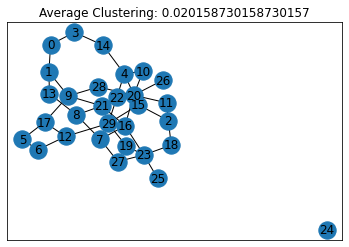

In [47]:
p=0.04
G = GenErdosRenyi(N,p)
nx.draw_networkx(G)
plt.title(f"Average Clustering: {avg_clustering(G)}")
plt.show()

## Diameter of a Graph

In [34]:
def diameter(G):
    try:
        nx.algorithms.distance_measures.diameter(G)
        return nx.algorithms.distance_measures.diameter(G) ## means graph is connected, diameter < \infty
    except nx.NetworkXError:
        return np.inf ## means graph is disconnected

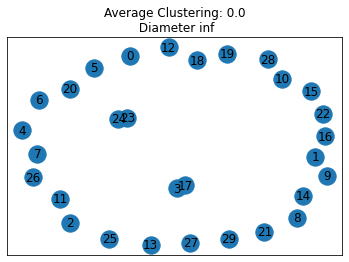

In [54]:
p=0.004
G = GenErdosRenyi(N,p)
nx.draw_networkx(G)
plt.title(f"Average Clustering: {avg_clustering(G)}\n Diameter {diameter(G)}")
plt.show()

Note that, if the graph is disconnected, the diameter is equal to $\infty$ per definition.

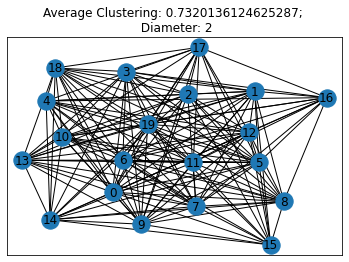

In [40]:
p = 0.6
G = GenErdosRenyi(N,p)
nx.draw_networkx(G)
plt.title(f"Average Clustering: {avg_clustering(G)} \n Diameter: {diameter(G)}")
plt.show()